In [17]:
import sys
sys.path.insert(0, '../gambit')

import os
import numpy as np
from scipy import stats
from scipy import ndimage
import itertools

from gambit import create_diff_image, clean_data
from mask import create_segmentation_masks
from fits import read_fits, view_fits, write_fits

In [18]:
bands_in_order = ['g','r','i','z','y']

In [19]:
path_to_input = "/Users/cora-at-work/Desktop/github/spin-parity-catalog/original/galaxies/"
table_key = "table4"

def get_galaxy_list():
    return os.listdir(os.path.join(path_to_input,table_key))

def fits_path(name,band):
    return os.path.join(path_to_input,table_key,name,"{}_{}.fits".format(name,band))

In [20]:
from scipy import ndimage
import matplotlib.pyplot as plt

def calculate_center_of_mass(the_mask):
    return ndimage.center_of_mass(the_mask)

def get_cms(diff_per,foreground):
    thresholds = []
    above_threshold_cm = []
    below_threshold_cm = []
    
    m, s = np.mean(diff_per[foreground]), np.std(diff_per[foreground])
    
    for i in np.linspace(m-1*s,m+1*s):
        above_area = np.logical_and(foreground,diff_per>=i)
        below_area = np.logical_and(foreground,diff_per<i)
        
        thresholds.append(i)
        above_threshold_cm.append(calculate_center_of_mass(above_area))
        below_threshold_cm.append(calculate_center_of_mass(below_area))
        
    return (thresholds,above_threshold_cm,below_threshold_cm)

def visualize_diff_cm(diff,foreground):
    (ts,a_cms,b_cms) = get_cms(diff,foreground)
    
    a_points = np.asarray(a_cms)
    b_points = np.asarray(b_cms)

    c = calculate_center_of_mass(foreground)
    plt.imshow(diff, interpolation='nearest', cmap='gray', origin='lower')
    plt.plot(a_points[:,0],a_points[:,1],color="blue") #break down above x,and y 
    plt.plot(b_points[:,0],b_points[:,1],color="red") #break down below x,and y
    plt.plot((a_points[:,0]+b_points[:,0])/2,(a_points[:,1]+b_points[:,1])/2,color="orange") #break down above x,and y 
    plt.plot(c[0],c[1],marker='v',color='green')

    plt.show()

In [21]:
def construct_diff(name,first_band,base_band):
    first_band_path = fits_path(name,first_band)
    base_band_path = fits_path(name,base_band)
    
    if not (os.path.exists(first_band_path) and os.path.exists(base_band_path)): 
        print("path does not exist gaurd")
        return None

    first_band_data = clean_data(read_fits(first_band_path)) #added clean to handle infs/ nans
    base_band_data = clean_data(read_fits(base_band_path)) #added clean to handle infs/ nans
    
    if first_band_data.shape != base_band_data.shape: 
        print("shape issue gaurd")
        return None
    
    (foreground,_) = create_segmentation_masks(base_band_data)
    
    if np.sum(foreground) <= 0.01*np.sum(np.shape(base_band_data)): 
        print("small forground gaurd")
        return None
    
    diff = create_diff_image(first_band_data,base_band_data,foreground)

    #return diff
    #view_fits(diff)
    #view_fits(foreground)
    visualize_diff_cm(diff,foreground)

NGC4800
g r


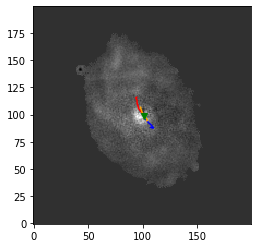

g i


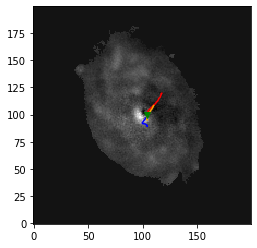

g z


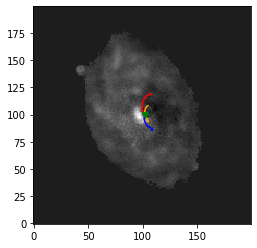

g y


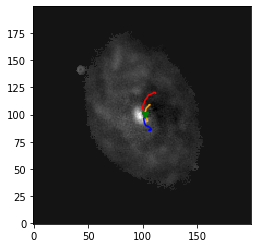

r i


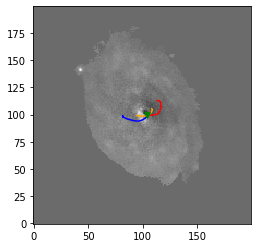

r z


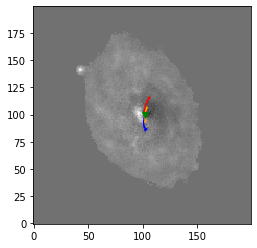

r y


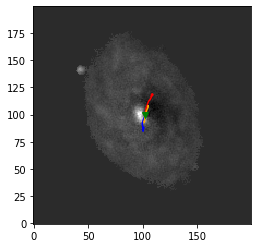

i z


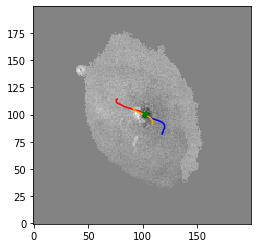

i y


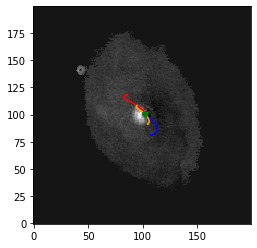

z y


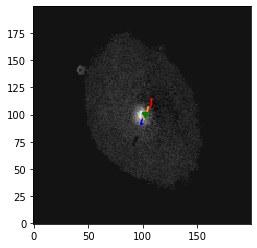

NGC5522
g r


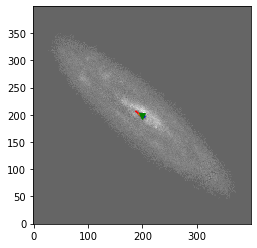

g i


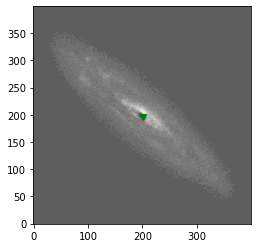

g z


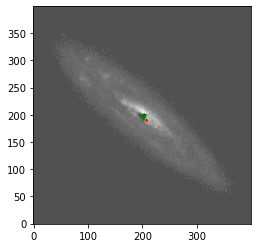

g y


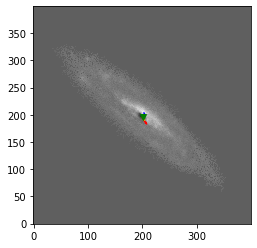

r i


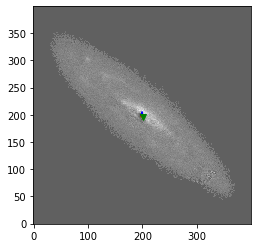

r z


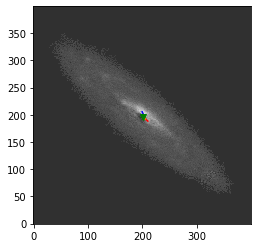

r y


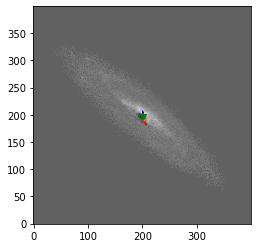

i z


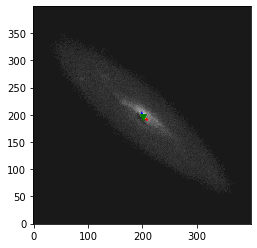

i y


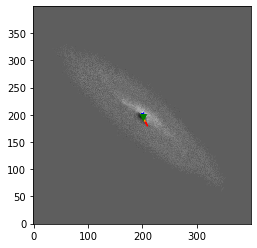

z y


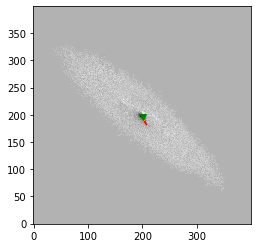

NGC4094
g r


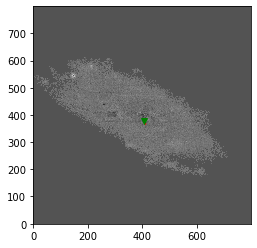

g i


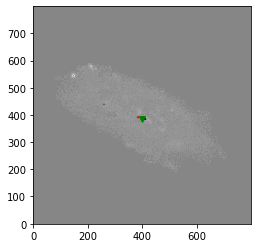

g z


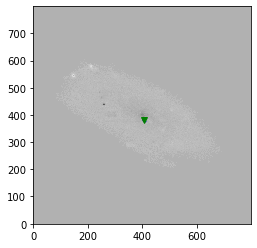

g y


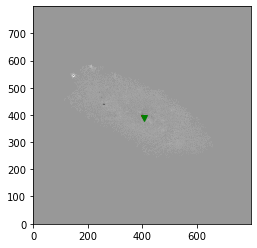

r i


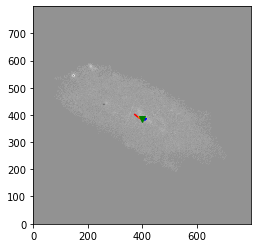

r z


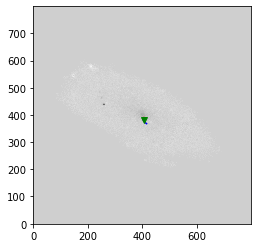

r y


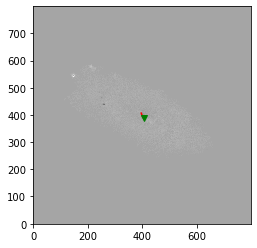

i z


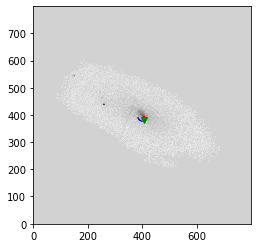

i y


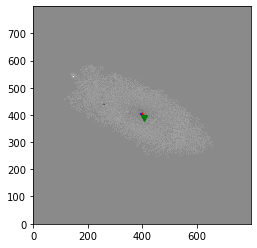

z y


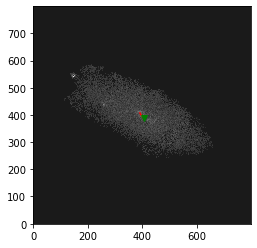

NGC3887
g r


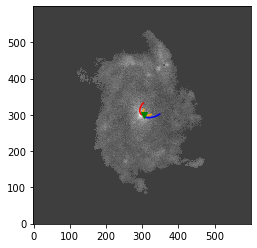

g i


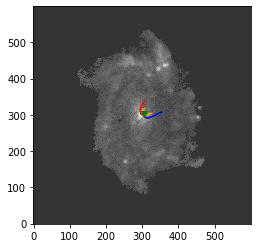

g z


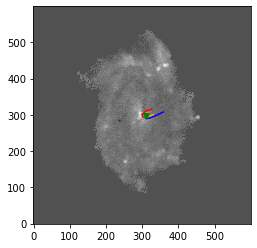

g y


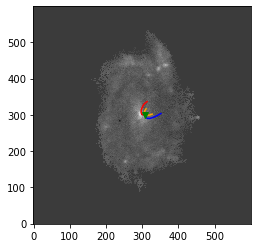

r i


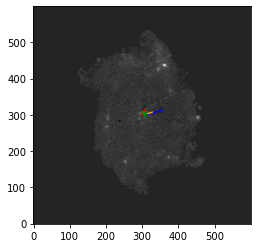

r z


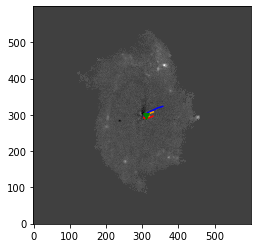

r y


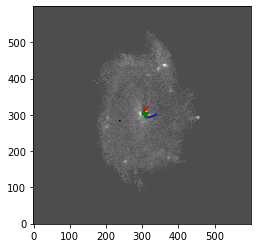

i z


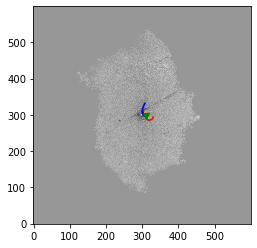

i y


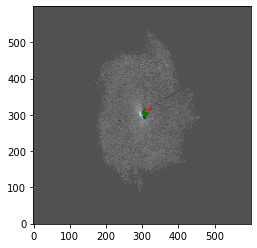

z y


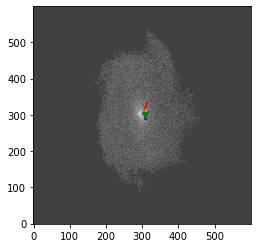

NGC7448
g r


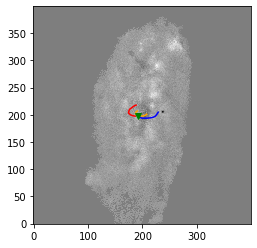

g i


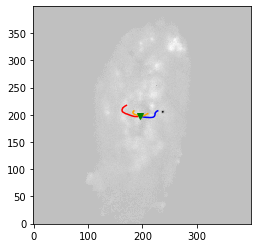

g z


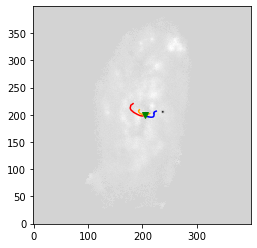

g y


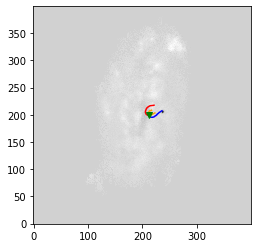

r i


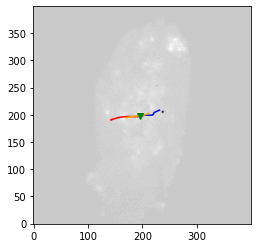

r z


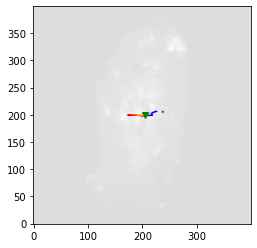

r y


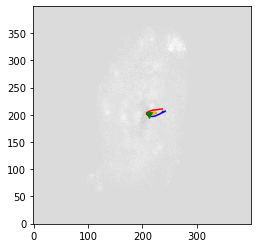

i z


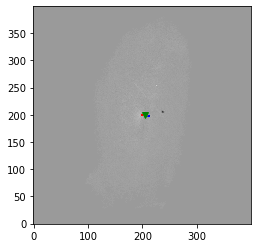

i y


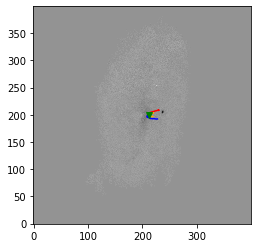

z y


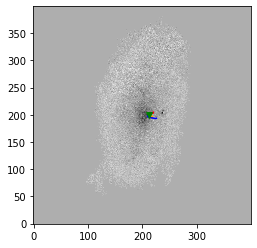

.DS_Store
g r
path does not exist gaurd
g i
path does not exist gaurd
g z
path does not exist gaurd
g y
path does not exist gaurd
r i
path does not exist gaurd
r z
path does not exist gaurd
r y
path does not exist gaurd
i z
path does not exist gaurd
i y
path does not exist gaurd
z y
path does not exist gaurd
IC750
g r


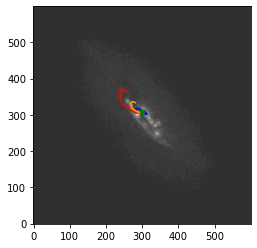

g i


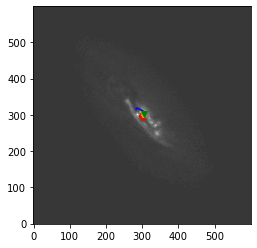

g z


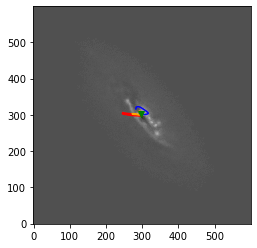

g y


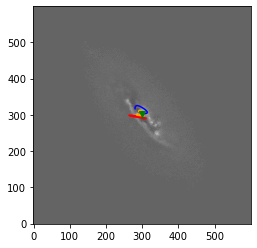

r i


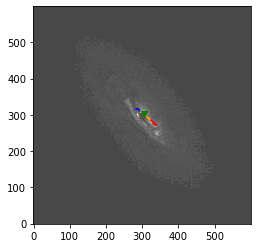

r z


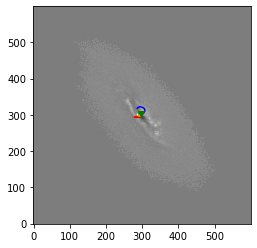

r y


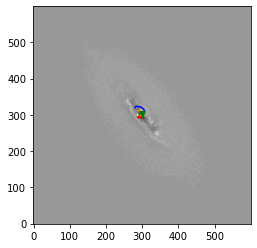

i z


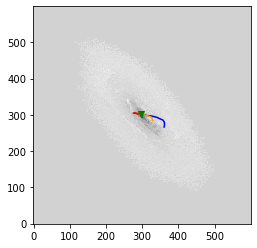

i y


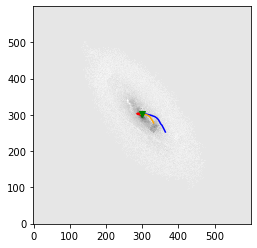

z y


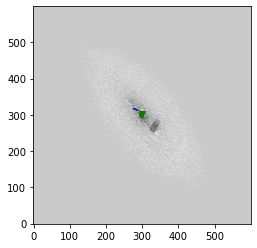

NGC4178
g r


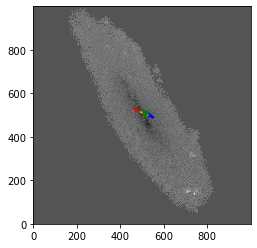

g i


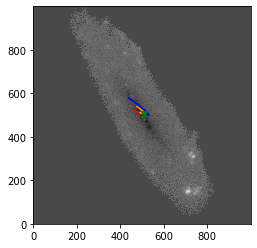

g z


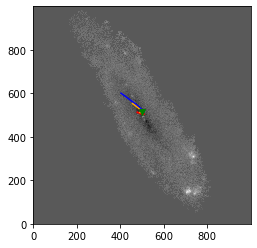

g y


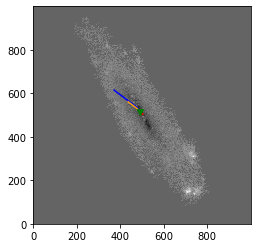

r i


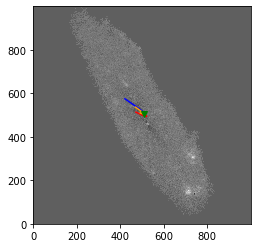

r z


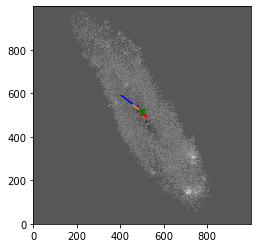

r y


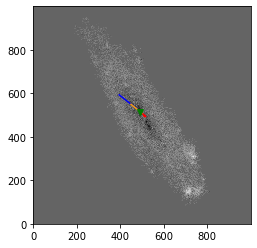

i z


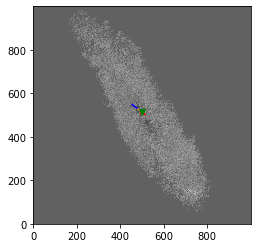

i y


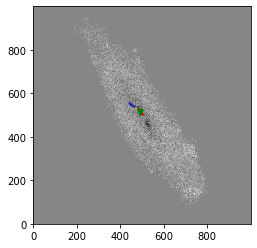

z y


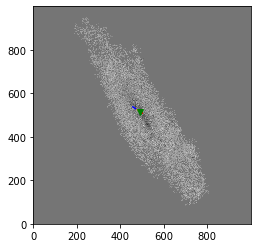

NGC779
g r


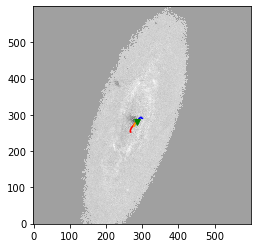

g i


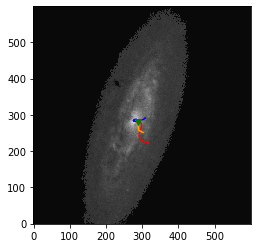

g z


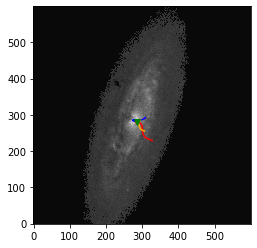

g y


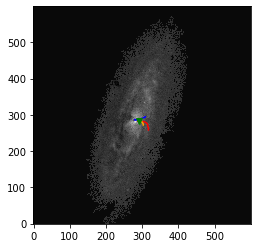

r i


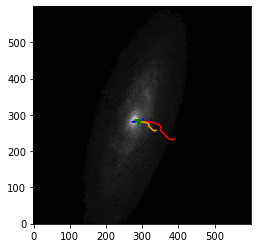

r z


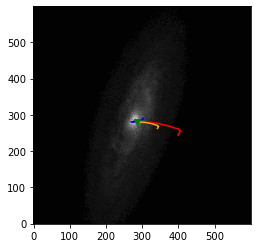

r y


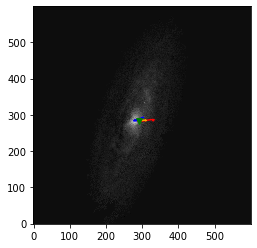

i z


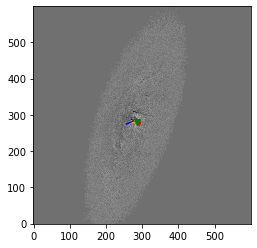

i y


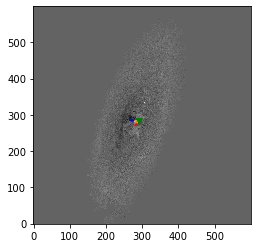

z y


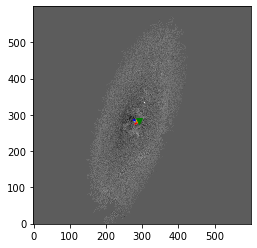

NGC4579
g r


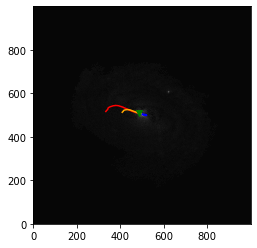

g i


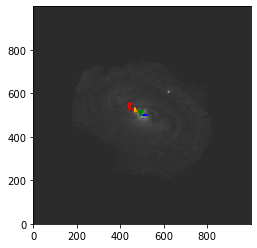

g z


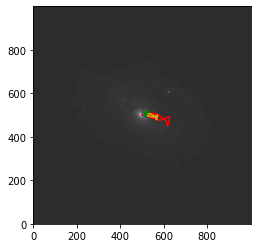

g y


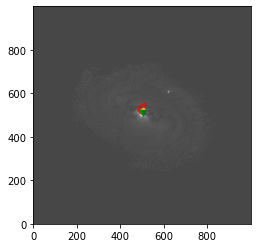

r i


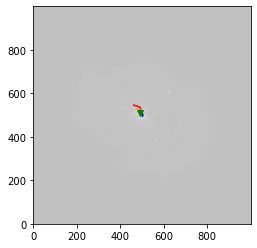

r z


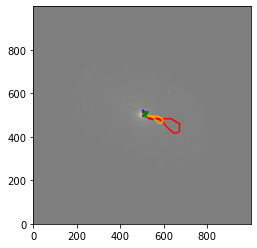

r y


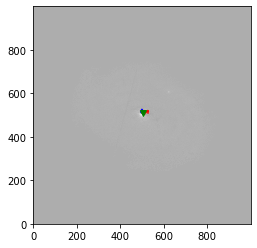

i z


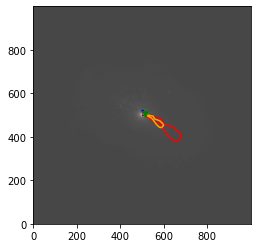

i y


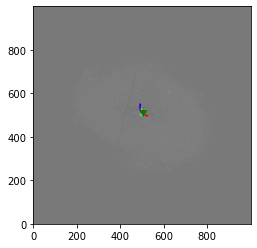

z y


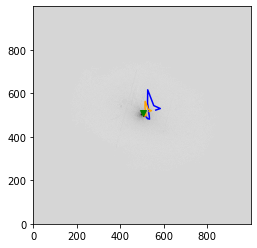

NGC5690
g r


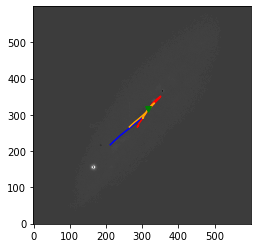

g i


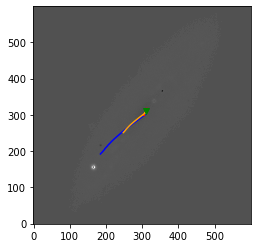

g z


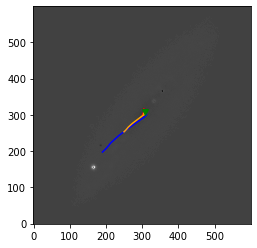

g y


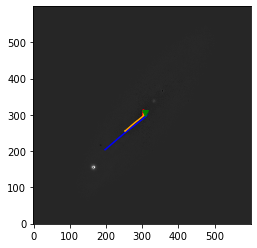

r i


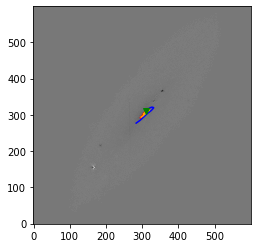

r z


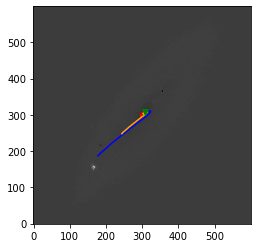

r y


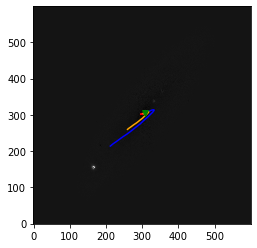

i z


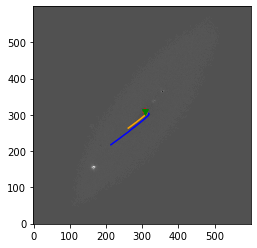

i y


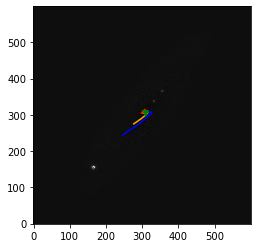

z y


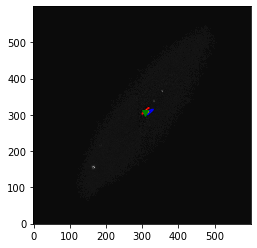

In [23]:
i = 0
for name in get_galaxy_list():
    print(name)
    for (first_band,base_band) in itertools.combinations(bands_in_order, 2):
        print(first_band,base_band)
        diff = construct_diff(name,first_band,base_band)
    #path_d = "/Users/cora-at-work/Desktop/test_{}.fits".format(name)
    #write_fits(path_d,diff)
    i += 1
    if i > 10:
        break

In [8]:
#TODO:
# 1 - select two bands (first_band & base_band s.t. first_band comes before base_band in bands_in_order_list)
# 2 - pick a galaxy from table 2, read in fits file for first_band and base_band
# 3 - generate (foreground,background) using create_segmentation_mask
# 4 - use fits from #2 and foreground mask from #3 to create diff using create_diff_image
# 5 - Visualize using view_fits (experiment with mask:np.array and std_range:float)

In [9]:
#For example: For IC1683 table 2 (g,r) bands diff would look like: